In [1]:
import itertools
import time
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import emcee

In [2]:
N = 1000

p = [0.3, 0.7]
μ = [3.4, 3.7]
σ = [0.2, 0.1]

data = [np.random.normal(μ[i], σ[i]) for i in np.random.choice([0, 1], size=N, p=p)]

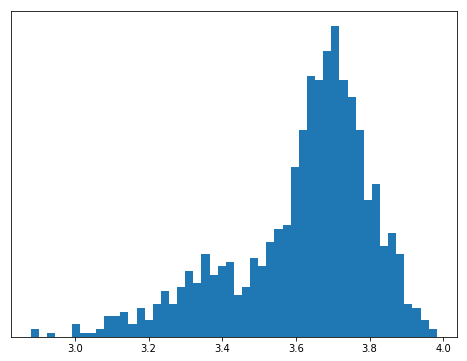

In [3]:
plt.figure(figsize=(8,6))
plt.hist(data, bins=50, density=True)
plt.yticks([])
plt.show()

In [4]:
def lnprob(θ, x):
    p0, μ0, σ0, μ1, σ1 = θ
    if μ0 > μ1 or p0 < 0 or p0 > 1 or σ0 < 0 or σ1 < 0:
        return -np.inf
    return np.sum(np.log(p0 * norm.pdf(x, μ0, σ0) + (1 - p0) * norm.pdf(x, μ1, σ1)))

In [5]:
ndim, nwalkers = 5, 10
dims = ['p_0', 'μ_0', 'σ_0', 'μ_1', 'σ_1']
initial_guess = [0.28, 3.2, 0.3, 3.6, 0.2]
pos = [1e-2*np.random.randn(ndim) + initial_guess for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(data,))
start = time.process_time()
sampler.run_mcmc(pos, 5000)
print('Completed in {:.1f} seconds.'.format(time.process_time() - start))

Completed in 32.8 seconds.


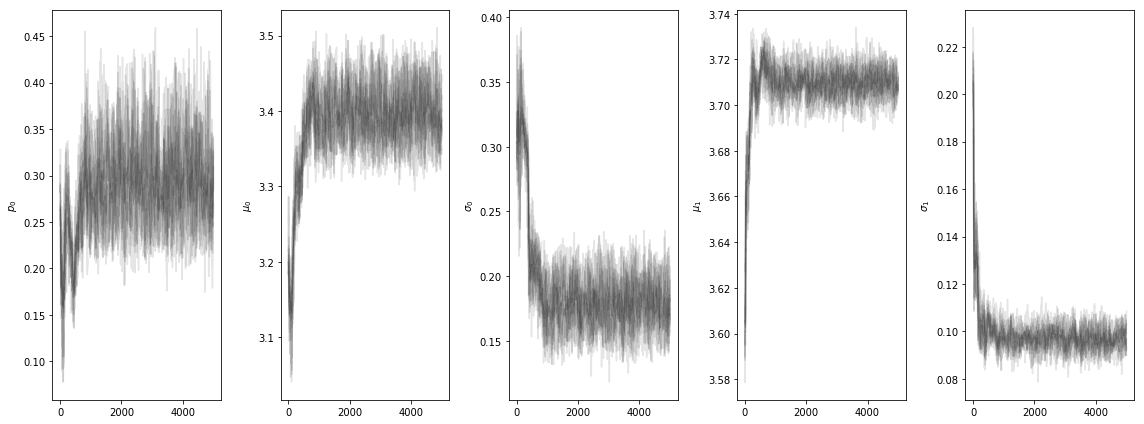

In [6]:
fig, axs = plt.subplots(1, ndim, figsize=(16,6))
for i in range(ndim):
    for j in range(nwalkers):
        axs[i].plot(sampler.chain[j][:,i], alpha=0.1, c='k')
    axs[i].set_ylabel(f'${dims[i]}$')
plt.tight_layout()
plt.show()

In [7]:
samples = sampler.chain[:, 1000:, :].reshape((-1, ndim))

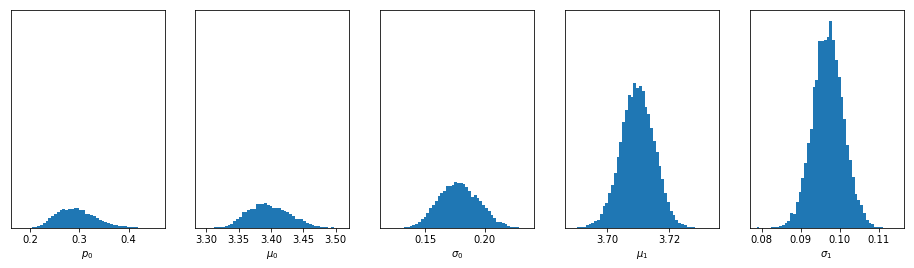

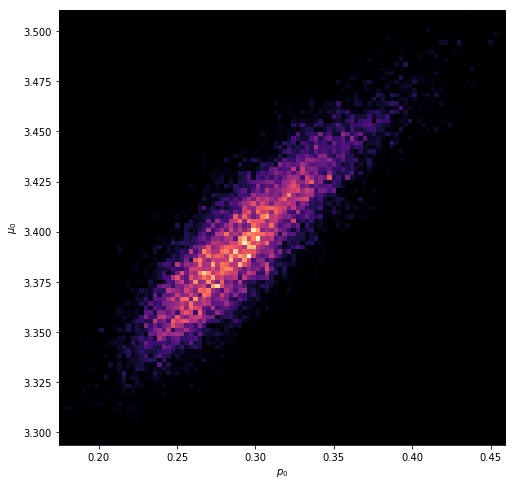

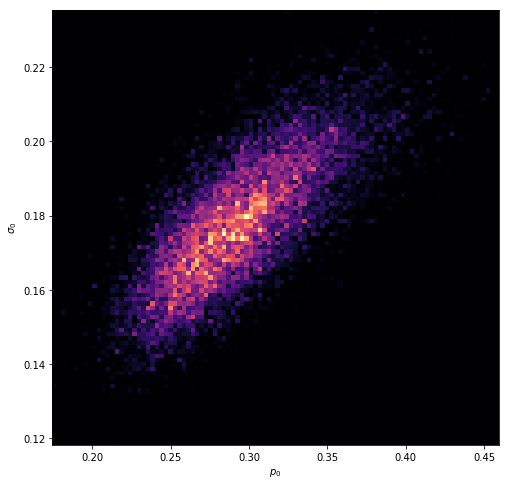

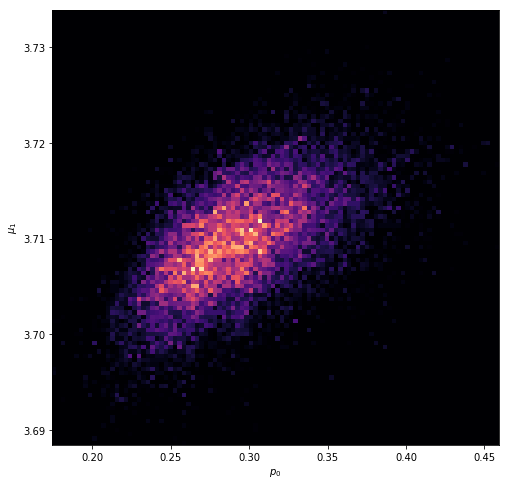

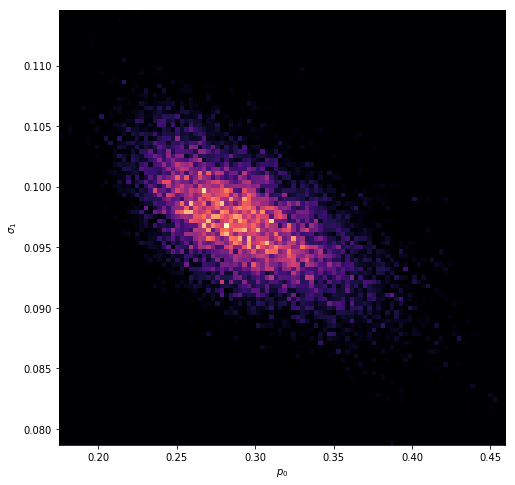

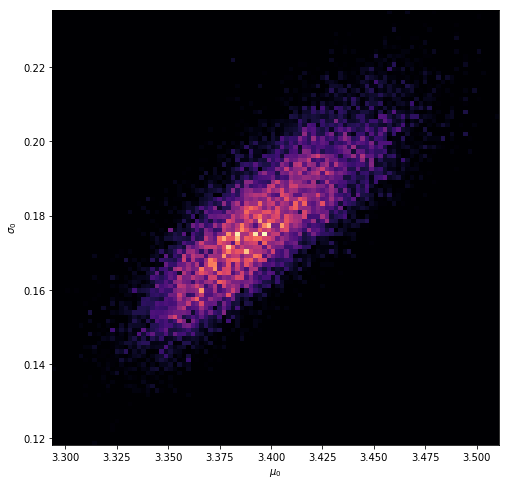

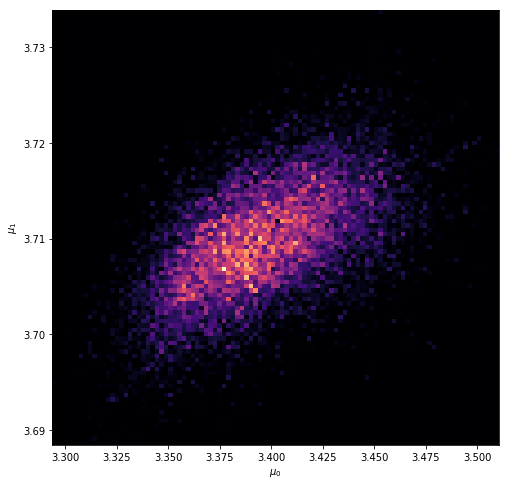

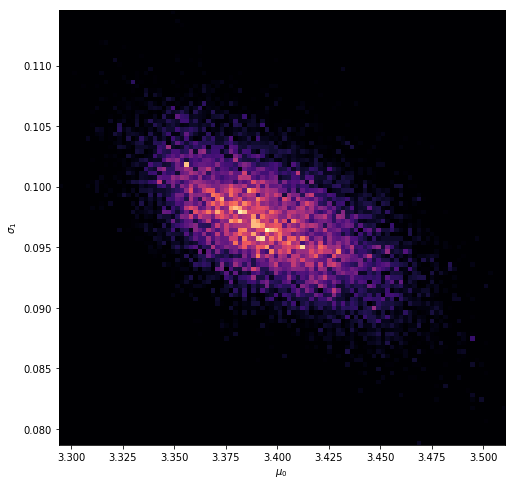

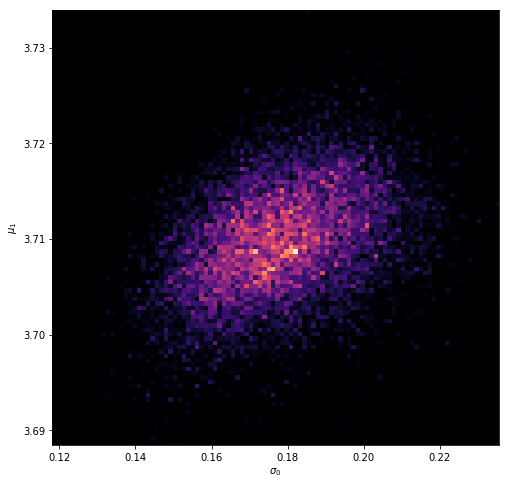

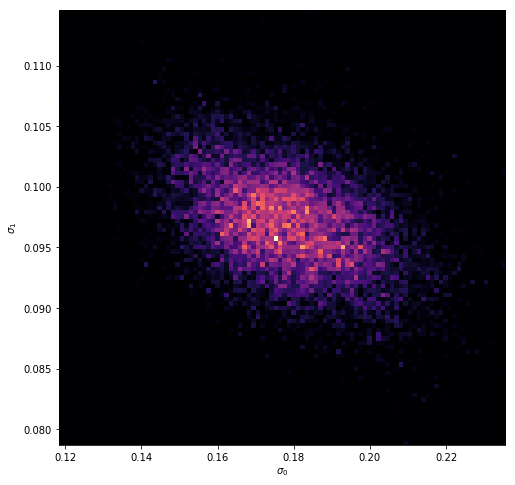

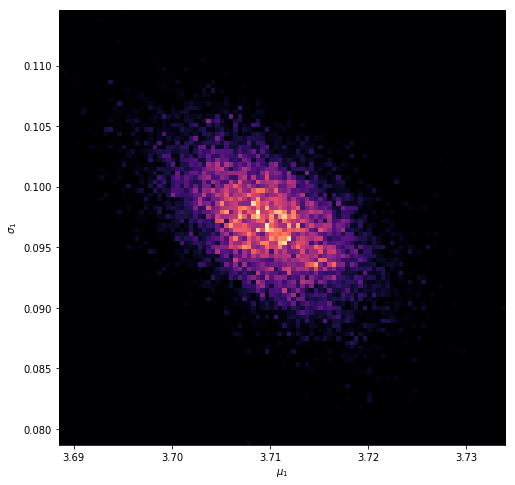

p_0: 0.294±0.039
μ_0: 3.396±0.032
σ_0: 0.178±0.016
μ_1: 3.710±0.005
σ_1: 0.097±0.004


In [10]:
fig, axs = plt.subplots(1, ndim, sharey=True, figsize=(16,4))
for i in range(ndim):
    axs[i].hist(samples[:,i], bins=50, density=True)
    axs[i].set_yticks([])
    axs[i].set_xlabel(f'${dims[i]}$')
plt.show()

for i, j in itertools.permutations(range(ndim), 2):
    if i > j:
        continue
    plt.figure(figsize=(8,8))
    plt.hist2d(samples[:,i], samples[:,j], bins=100, cmap='magma')
    plt.xlabel(f'${dims[i]}$')
    plt.ylabel(f'${dims[j]}$')
    plt.show()

for i in range(ndim):
    print(f'{dims[i]}: {np.mean(samples[:,i]):.3f}±{np.std(samples[:,i]):.3f}')

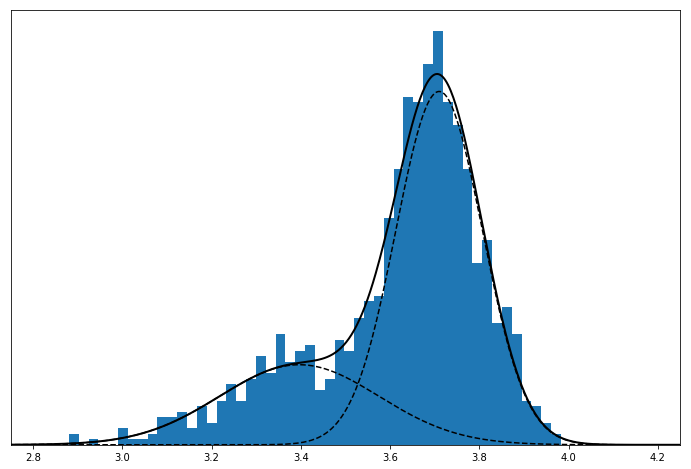

In [9]:
p0mcmc = np.mean(samples[:,0])
μ0mcmc = np.mean(samples[:,1])
σ0mcmc = np.mean(samples[:,2])
μ1mcmc = np.mean(samples[:,3])
σ1mcmc = np.mean(samples[:,4])

plt.figure(figsize=(12,8))
plt.hist(data, bins=50, density=True)
xs = np.linspace(2, 5, 1000)
plt.plot(xs, p0mcmc*norm.pdf(xs, μ0mcmc, σ0mcmc) + (1-p0mcmc)*norm.pdf(xs, μ1mcmc, σ1mcmc), lw=2, c='k')
plt.plot(xs, p0mcmc*norm.pdf(xs, μ0mcmc, σ0mcmc), ls='--', c='k')
plt.plot(xs, (1-p0mcmc)*norm.pdf(xs, μ1mcmc, σ1mcmc), ls='--', c='k')
plt.xlim(2.75, 4.25)
plt.yticks([])
plt.show()